In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (6,279 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 런타임 재시작

In [1]:
%cd /content/drive/MyDrive/금융데이터 공모전

/content/drive/MyDrive/금융데이터 공모전


In [77]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
!pip install graphviz

매출건수만 따로 추출해서 분석

In [239]:
family=pd.read_csv("gagu.csv", encoding='cp949').drop(columns=['Unnamed: 0', '법정동'])
family['가구생애주기']=family['가구생애주기'].replace({'1인가구':1,'신혼영유아가구':2, '초중고자녀가구':3,'성인자녀가구':4,'노인가구':5})
family['기준년월']=family['기준년월'].replace({201903:1,201909:2, 202003:3, 202009:4, 202103:5})
family=family.fillna(0)
family=family[family['가구생애주기']!=5]
family=family.iloc[:,[0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [240]:
family[family['가구생애주기']==5]

,기준년월,성별,연령,가구생애주기,DIY자재/용품_매출건수,e머니/상품권_매출건수,o3o서비스_매출건수,가공식품_매출건수,가방_매출건수,가전_매출건수,건강식품_매출건수,기부/후원_매출건수,기타_매출건수,기타결제_매출건수,기타교육비_매출건수,남성뷰티_매출건수,남성속옷실내복_매출건수,남성의류_매출건수,다이어트_매출건수,디지털_매출건수,레저_매출건수,메이크업_매출건수,모바일상품_매출건수,문화_매출건수,미성년자이용불가_매출건수,바디케어_매출건수,반려동물_매출건수,베이비용품서비스_매출건수,뷰티소품_매출건수,생활용품_매출건수,소파/의자_매출건수,수납가구_매출건수,스킨케어_매출건수,스포츠_매출건수,스포츠의류_매출건수,시계/주얼리_매출건수,신발_매출건수,신선/요리재료_매출건수,양말_매출건수,어린이용품서비스_매출건수,여성속옷실내복_매출건수,여성의류_매출건수,여행_매출건수,육아용품서비스_매출건수,음료_매출건수,인테리어소품_매출건수,임산부용품서비스_매출건수,자동차_매출건수,취미/특기_매출건수,침구/수예_매출건수,침대_매출건수,테이블가구_매출건수,패션소품_매출건수,향수_매출건수


In [241]:
# for i in range(3,53):
#   print(2*(i)-1,end=',')

In [242]:
X=family.iloc[:,4:]
y=family.iloc[:,[3]]

In [207]:
X

,DIY자재/용품_매출건수,e머니/상품권_매출건수,o3o서비스_매출건수,가공식품_매출건수,가방_매출건수,가전_매출건수,건강식품_매출건수,기부/후원_매출건수,기타_매출건수,기타결제_매출건수,기타교육비_매출건수,남성뷰티_매출건수,남성속옷실내복_매출건수,남성의류_매출건수,다이어트_매출건수,디지털_매출건수,레저_매출건수,메이크업_매출건수,모바일상품_매출건수,문화_매출건수,미성년자이용불가_매출건수,바디케어_매출건수,반려동물_매출건수,베이비용품서비스_매출건수,뷰티소품_매출건수,생활용품_매출건수,소파/의자_매출건수,수납가구_매출건수,스킨케어_매출건수,스포츠_매출건수,스포츠의류_매출건수,시계/주얼리_매출건수,신발_매출건수,신선/요리재료_매출건수,양말_매출건수,어린이용품서비스_매출건수,여성속옷실내복_매출건수,여성의류_매출건수,여행_매출건수,육아용품서비스_매출건수,음료_매출건수,인테리어소품_매출건수,임산부용품서비스_매출건수,자동차_매출건수,취미/특기_매출건수,침구/수예_매출건수,침대_매출건수,테이블가구_매출건수,패션소품_매출건수,향수_매출건수
0,0.0,702060.0,13618251.0,318720.0,0.0,0.0,862057.0,0,0.0,266816.0,0.0,0.0,0.0,1347488.0,0,5798971.0,0.0,0.0,269317.0,118946.0,0.0,236065.0,0.0,0.0,0.0,444065.0,0.0,0.0,0.0,0.0,1182245.0,0.0,1381231.0,0.0,0.0,0.0,0.0,0.0,2616631.0,0.0,0.0,0.0,0.0,0.0,4756975.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,864484.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2134445.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3647166.0,0.0,0.0,0.0,0.0,0.0,1113707.0,0.0,0.0,0.0,0.0,0.0
3,1080521.0,3600015.0,57461456.0,9026481.0,0.0,39755142.0,4135460.0,0,567484.0,1015110.0,0.0,0.0,0.0,957182.0,0,16190891.0,430116.0,0.0,839637.0,6288520.0,0.0,1791965.0,383911.0,5574057.0,574676.0,12759566.0,0.0,3045584.0,1711604.0,2802093.0,2763463.0,0.0,1412374.0,7342034.0,732485.0,6724043.0,0.0,830798.0,11179620.0,5987547.0,2626345.0,1594809.0,668324.0,471401.0,8605045.0,3075242.0,6226610.0,4203398.0,5478900.0,0.0
4,0.0,0.0,12170741.0,639274.0,0.0,2713602.0,1555704.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2426229.0,0.0,0.0,0.0,0.0,0.0,809566.0,901630.0,0.0,0.0,1184021.0,0.0,14068291.0,719269.0,0.0,0.0,0.0,0.0,2127437.0,0.0,483020.0,0.0,0.0,3178029.0,1087067.0,834467.0,0.0,0.0,0.0,5946787.0,1074476.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,0.0,0.0,1863012.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,424940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171639.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24799,0.0,299624.0,6147091.0,657255.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,853583.0,0.0,0.0,0.0,1663610.0,0.0,0.0,0.0,0.0,0.0,569953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1479444.0,0.0,0.0,0.0,0.0,0.0,821315.0,329255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24800,0.0,396113.0,2912284.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530084.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,901644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24801,0.0,105391.0,5057754.0,353441.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,418806.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564135.0,0.0,0.0,0.0,0.0,0.0


In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [244]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [245]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [249]:
xgb_clf = xgb.XGBClassifier()
xgbc=XGBClassifier(max_depth=9, n_estimators=100, colsample_bytree=1, learning_rate=0.1,subsample=0.6, min_child_weight=1.5)
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [250]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           1       0.67      0.70      0.68      1390
           2       0.52      0.67      0.58      1430
           3       0.50      0.28      0.36       882
           4       0.61      0.52      0.56       855

    accuracy                           0.58      4557
   macro avg       0.57      0.54      0.55      4557
weighted avg       0.58      0.58      0.57      4557



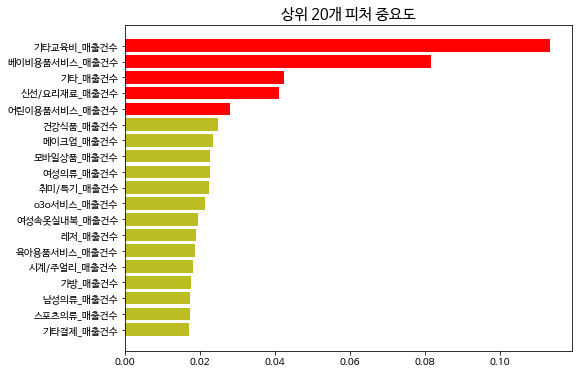

In [251]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

PCA진행하여 가구형태를 예측하는데 중요하게 작용하는 구매품목 추출

In [143]:
family=pd.read_csv("gagu.csv", encoding='cp949').drop(columns=['Unnamed: 0', '법정동'])
family['가구생애주기']=family['가구생애주기'].replace({'1인가구':1,'신혼영유아가구':2, '초중고자녀가구':3,'성인자녀가구':4,'노인가구':5})
family['기준년월']=family['기준년월'].replace({201903:1,201909:2, 202003:3, 202009:4, 202103:5})
family=family.fillna(0)
family=family[family['가구생애주기']!=5]
family=family.iloc[:,[0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [149]:
X=family.iloc[:,4:]
y=family.iloc[:,[3]]

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [151]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [152]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [153]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

xgbc=XGBClassifier(max_depth=9, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.8,min_child_weight=1.5)
xgbc.fit(X_train_s,y_train)

selector =RFE(xgbc, n_features_to_select=10)
selector = selector.fit(X_test_s, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
selector.support_  

array([False,  True,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [157]:
##피처들의 순위
selector.ranking_

array([31,  1,  1, 14,  3, 18,  1, 41,  1, 12,  1, 40, 25, 19, 38, 17,  4,
        1,  1,  9, 35, 24, 23,  1, 16, 10, 37, 33,  8, 30,  7, 26, 22,  1,
       34,  1,  5, 11, 20,  6, 13, 29, 32, 21,  2, 27, 39, 36, 28, 15])

In [158]:
###PCA이후에 중요 피처 열이름 추출
i=0
coln=[]
for i in range(0,49):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [159]:
coln

[' e머니/상품권_매출건수',
 'o3o서비스_매출건수',
 '건강식품_매출건수',
 '기타_매출건수',
 '기타교육비_매출건수',
 '메이크업_매출건수',
 '모바일상품_매출건수',
 '베이비용품서비스_매출건수',
 '신선/요리재료_매출건수',
 '어린이용품서비스_매출건수']

중요 5가지 피처들만 가지고 분석(['기타_매출금액', '기타교육비_매출금액', '기타교육비_매출건수', '베이비용품서비스_매출금액', '베이비용품서비스_매출건수')

노인가구는 데이터 수가 너무 적어서 bias가 생겨서 그냥 전체 drop해주고 분석 진행

In [215]:
family=pd.read_csv("gagu.csv", encoding='cp949').drop(columns=['Unnamed: 0', '법정동'])
family['가구생애주기']=family['가구생애주기'].replace({'1인가구':1,'신혼영유아가구':2, '초중고자녀가구':3,'성인자녀가구':4,'노인가구':5})
family['기준년월']=family['기준년월'].replace({201903:1,201909:2, 202003:3, 202009:4, 202103:5})
family=family.fillna(0)
family=family[family['가구생애주기']!=5]
family=family.iloc[:,[0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [216]:
X=family[[' e머니/상품권_매출건수',
 'o3o서비스_매출건수',
 '건강식품_매출건수',
 '기타_매출건수',
 '기타교육비_매출건수',
 '메이크업_매출건수',
 '모바일상품_매출건수',
 '베이비용품서비스_매출건수',
 '신선/요리재료_매출건수',
 '어린이용품서비스_매출건수']]
y=family.iloc[:,[3]]

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

RandomsearchCV를 통해 hyperparameter 추출

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [191]:
clf = xgb.XGBClassifier()

param_grid = {
        'max_depth': [6, 9, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 1.5, 3.0, 7.0, 10.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 5,
              'eval_set': [(X_test_s, y_test)]}

hr_grid = RandomizedSearchCV(clf, param_grid, n_iter=100,
                            n_jobs=-1, verbose=2, cv=3,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [192]:
hr_grid.fit(X_train_s, y_train,**fit_params)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.4min finished


,mean_test_score,params
0,-1.348538,"{'subsample': 0.5, 'n_estimators': 100, 'min_c..."
1,-1.014506,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
2,-1.173957,"{'subsample': 0.7, 'n_estimators': 100, 'min_c..."
3,-1.347977,"{'subsample': 0.7, 'n_estimators': 100, 'min_c..."
4,-1.012771,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
...,...,...
95,-1.040452,"{'subsample': 0.8, 'n_estimators': 100, 'min_c..."
96,-1.346137,"{'subsample': 0.6, 'n_estimators': 100, 'min_c..."
97,-1.344279,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
98,-1.021870,"{'subsample': 0.6, 'n_estimators': 100, 'min_c..."


In [193]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,6.869093,0.479887,0.191214,0.027211,0.6,100,10,6,0.1,1,"{'subsample': 0.6, 'n_estimators': 100, 'min_c...",-0.996099,-1.017539,-0.999588,-1.004408,0.009393,1
61,6.037437,0.493791,0.193582,0.012483,0.5,100,10,6,0.1,0.8,"{'subsample': 0.5, 'n_estimators': 100, 'min_c...",-0.997729,-1.015609,-1.000516,-1.004618,0.007854,2
41,3.206135,0.019483,0.092222,0.001029,0.8,100,0.5,6,0.2,0.6,"{'subsample': 0.8, 'n_estimators': 100, 'min_c...",-0.997892,-1.018048,-1.004240,-1.006727,0.008414,3
4,7.965249,0.376340,0.267994,0.017291,1,100,10,9,0.1,0.8,"{'subsample': 1.0, 'n_estimators': 100, 'min_c...",-1.005580,-1.023830,-1.008904,-1.012771,0.007936,4
46,7.211280,0.179913,0.263625,0.010012,0.9,100,7,9,0.1,0.7,"{'subsample': 0.9, 'n_estimators': 100, 'min_c...",-1.003866,-1.023369,-1.011420,-1.012885,0.008029,5


GridsearchCV를 통해 hyperparameter 추출

In [194]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [231]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [6, 9],
              'learning_rate': [0.01,0.1],
              'subsample': [0.5, 0.6, 0.8],
              'n_estimators': [100],
              'colsample_bytree': [0.6, 0.8, 1],
              'min_child_weight':[0.7,1,1.5,10]}
              
fit_params={"early_stopping_rounds":5,'eval_set': [(X_test_s, y_test)] }
# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='f1_macro',
                       n_jobs=4,
                       cv=3,
                       refit=True, 
                       return_train_score=True)

In [232]:
hr_grid.fit(X_train_s, y_train,**fit_params)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

[0]	validation_0-merror:0.484749
Will train until validation_0-merror hasn't improved in 5 rounds.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-merror:0.476629
[2]	validation_0-merror:0.472679
[3]	validation_0-merror:0.473338
[4]	validation_0-merror:0.470046
[5]	validation_0-merror:0.467632
[6]	validation_0-merror:0.465218
[7]	validation_0-merror:0.465877
[8]	validation_0-merror:0.466974
[9]	validation_0-merror:0.468071
[10]	validation_0-merror:0.469607
[11]	validation_0-merror:0.469827
Stopping. Best iteration:
[6]	validation_0-merror:0.465218



,mean_test_score,params
0,0.469891,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
1,0.467826,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
2,0.468795,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
3,0.469805,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
4,0.466660,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
...,...,...
139,0.488396,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
140,0.487420,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
141,0.489523,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
142,0.484858,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."


In [233]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
133,4.695724,1.875975,0.085229,0.053677,1,0.1,9,0.7,100,0.6,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.496686,0.487677,0.486235,0.490199,0.004624,1,0.596995,0.632409,0.587958,0.605787,0.019183
141,5.471680,1.709288,0.111134,0.043595,1,0.1,9,10,100,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.489876,0.484256,0.494436,0.489523,0.004163,2,0.532073,0.559368,0.558012,0.549818,0.012559
134,6.681488,0.138143,0.131913,0.005312,1,0.1,9,0.7,100,0.8,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.494057,0.486263,0.486191,0.488837,0.003691,3,0.630229,0.641007,0.637026,0.636087,0.004450
135,5.129738,0.343834,0.098593,0.019591,1,0.1,9,1,100,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.492795,0.482640,0.490774,0.488736,0.004389,4,0.595141,0.597493,0.604909,0.599181,0.004163
136,3.990878,0.983233,0.049022,0.009510,1,0.1,9,1,100,0.6,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.498473,0.481428,0.485442,0.488448,0.007276,5,0.604299,0.607142,0.584846,0.598762,0.009908


In [237]:
xgbc = XGBClassifier(max_depth=9, n_estimators=100, colsample_bytree=0.8, learning_rate=0.01,subsample=1, min_child_weight=1.5) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [238]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           1       0.51      0.88      0.65      1390
           2       0.61      0.46      0.52      1430
           3       0.52      0.16      0.25       882
           4       0.55      0.51      0.53       855

    accuracy                           0.54      4557
   macro avg       0.55      0.50      0.49      4557
weighted avg       0.55      0.54      0.51      4557



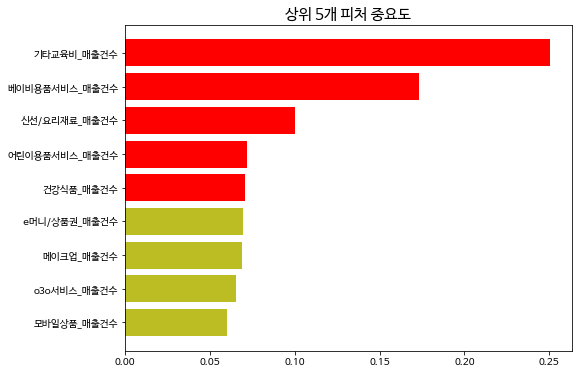

In [202]:
##상위 5개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 5개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:olive')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()